In [2]:
## dataset with user_keywords 
import pandas as pd
import numpy as np
import os
import tensorflow as tf 
import random
random.seed(100)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

In [250]:
# load dataset
user_keywords = pd.read_csv('./dataset/user_keywords.csv')

In [47]:
user_keywords

,user_id,keywords
0,113,新闻推荐|资讯推荐|内容推荐|文本分类|人工分类|自然语言处理|聚类|分类|冷启动
1,143,网络|睡眠|精神衰弱|声音|人工分类
2,123,新年愿望|梦想|2018|辞旧迎新
3,234,父母|肩头|饺子|蔬菜块|青春叛逆期|声音
4,117,新闻推荐|内容推荐|文本分类|人工分类|自然语言处理|聚类|分类|冷启动
5,119,新闻推荐|资讯推荐|人工分类|自然语言处理|聚类|分类|冷启动
6,12,新闻推荐|资讯推荐|内容推荐|文本分类|聚类|分类|冷启动
7,122,机器学习|新闻推荐|梦想|人工分类|自然语言处理


In [48]:
def date_process(user_item):
    """user_item is a DataFrame,
    只有两列column [user_id, keywords]
    1. user_item: user and item information, user_id, keywords, keyword_index
    2. user_index: user to index
    3. item_index：item to index
    """
    user_item["keywords"] = user_item["keywords"].apply(lambda x: x.split("|"))  #转成列表

    keyword_list = []
    print(type(user_item["keywords"])) # Series
    
    for i in user_item["keywords"].values:
        keyword_list.extend(i)  # 合并列表, 相同元素未去重  

    item_count = pd.DataFrame(pd.Series(keyword_list).value_counts()) # keyword count

    item_count['id'] = list(range(0, len(item_count)))  # add index to word_count(话题编号)
    
    # 将word的id对应起来, 速度太慢
    user_item['keyword_index'] = user_item['keywords'].apply(lambda x: list(item_count['id'][x]))
    
    # create user_index, item_index
    # user,item 分别建立索引   
    user_index = {v: k for k, v in user_item["user_id"].to_dict().items()}   
    item_index = item_count["id"].to_dict()

    return user_item, user_index, item_index

In [49]:
user_keywords, user_index, keyword_index = date_process(user_keywords)

<class 'pandas.core.series.Series'>


In [50]:
user_keywords

,user_id,keywords,keyword_index
0,113,"[新闻推荐, 资讯推荐, 内容推荐, 文本分类, 人工分类, 自然语言处理, 聚类, 分类,...","[0, 6, 7, 8, 1, 3, 4, 5, 2]"
1,143,"[网络, 睡眠, 精神衰弱, 声音, 人工分类]","[12, 13, 21, 10, 1]"
2,123,"[新年愿望, 梦想, 2018, 辞旧迎新]","[20, 9, 18, 19]"
3,234,"[父母, 肩头, 饺子, 蔬菜块, 青春叛逆期, 声音]","[16, 14, 17, 15, 22, 10]"
4,117,"[新闻推荐, 内容推荐, 文本分类, 人工分类, 自然语言处理, 聚类, 分类, 冷启动]","[0, 7, 8, 1, 3, 4, 5, 2]"
5,119,"[新闻推荐, 资讯推荐, 人工分类, 自然语言处理, 聚类, 分类, 冷启动]","[0, 6, 1, 3, 4, 5, 2]"
6,12,"[新闻推荐, 资讯推荐, 内容推荐, 文本分类, 聚类, 分类, 冷启动]","[0, 6, 7, 8, 4, 5, 2]"
7,122,"[机器学习, 新闻推荐, 梦想, 人工分类, 自然语言处理]","[11, 0, 9, 1, 3]"


In [52]:
user_index

{12: 6, 113: 0, 117: 4, 119: 5, 122: 7, 123: 2, 143: 1, 234: 3}

In [53]:
keyword_index

{'2018': 18,
 '人工分类': 1,
 '内容推荐': 7,
 '冷启动': 2,
 '分类': 5,
 '声音': 10,
 '文本分类': 8,
 '新年愿望': 20,
 '新闻推荐': 0,
 '机器学习': 11,
 '梦想': 9,
 '父母': 16,
 '睡眠': 13,
 '精神衰弱': 21,
 '网络': 12,
 '聚类': 4,
 '肩头': 14,
 '自然语言处理': 3,
 '蔬菜块': 15,
 '资讯推荐': 6,
 '辞旧迎新': 19,
 '青春叛逆期': 22,
 '饺子': 17}

In [63]:
def doc2tag(x,user_index):
    pairs = []
    for index in x["keyword_index"]:
        pairs.append((user_index[x["user_id"]], index))
    return pairs 

# 获取用户物品索引对 pair(user,item) , 分别对应索引id  
u2i_pairs = []
tmp = user_keywords.apply(lambda x: doc2tag(x,user_index), axis=1)
for i,row in tmp.iteritems():
    u2i_pairs.extend(row)  

In [76]:
u2i_pairs

[(0, 0),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 1),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 2),
 (1, 12),
 (1, 13),
 (1, 21),
 (1, 10),
 (1, 1),
 (2, 20),
 (2, 9),
 (2, 18),
 (2, 19),
 (3, 16),
 (3, 14),
 (3, 17),
 (3, 15),
 (3, 22),
 (3, 10),
 (4, 0),
 (4, 7),
 (4, 8),
 (4, 1),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 2),
 (5, 0),
 (5, 6),
 (5, 1),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 2),
 (6, 0),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 4),
 (6, 5),
 (6, 2),
 (7, 11),
 (7, 0),
 (7, 9),
 (7, 1),
 (7, 3)]

In [88]:
#  建立全连接网络 3 layers, relu 激活函数 
def build_embedding_model(embedding_size=50, classification = False):
    """
    根据用户行为相关的item ,if clicked by user
    Model to embed users and keywords using the Keras functional API.
    """
    # Both inputs are 1-dimensional
    user = tf.keras.Input(name='user', shape=[1])
    keyword = tf.keras.Input(name='keyword', shape=[1])

    # 50维 
    # Embedding the user default: (shape will be (None, 1, 50))
    user_embedding = tf.keras.layers.Embedding(name= 'user_embedding',
                                               input_dim= len(user_index),
                                               output_dim= embedding_size)(user)       #定义user embedding 维度 

    # Embedding the keyword default: (shape will be (None, 1, 50))
    keyword_embedding = tf.keras.layers.Embedding(name='keyword_embedding',
                                                  input_dim=len(keyword_index),
                                                  output_dim=embedding_size)(keyword)  #定义keyword embedding 维度 

    # Merge the layers with a dot product along the second axis
    # (shape will be (None, 1, 1))
    merged = tf.keras.layers.Dot(name='dot_product',
                                 normalize=True,
                                 axes=2) ([user_embedding, keyword_embedding])
    
    # 1维 
    # Reshape to be a single number (shape will be (None, 1))
    merged = tf.keras.layers.Reshape(target_shape=[1])(merged)

    # Squash outputs for classification
    out = tf.keras.layers.Dense(1, activation='sigmoid')(merged)
    
    # 调用 keras Model处理， NN 神经网络  
    model = tf.keras.Model(inputs=[user, keyword],
                           outputs=out)
    
    # 定义梯度损失优化函数 Adam   
    # Compile using specified optimizer and loss
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [89]:
model = build_embedding_model(embedding_size=20, classification=False)   # embedding_size 代表输出向量维度   

In [173]:
# 样本采样,
# 正样本从 观看序列pair中随机选,
# 负样本从 从全局序列中随机选;
def generate_batch(pairs, n_positive = 50, negative_ratio = 1.0):
    """
    Generate batches of samples for training.
    Random select positive samples from pairs 
    and randomly select negatives.
    """
    # Create empty array to hold batch
    batch_size = n_positive * (1 + negative_ratio) # 采样规模   
    batch = np.zeros((batch_size, 3))              # 采样存储空array数组   （100*3） 

    # Continue to yield samples, 迭代器采样  
    while True:
        # Randomly choose positive examples
        # 采样数不能超过 pairs 的个数, 这里pairs的length 是51个  
        for idx, (user_id, keyword_id) in enumerate(random.sample(pairs, n_positive)):
            batch[idx, :] = (user_id, keyword_id, 1)
            idx += 1

        # Add negative examples until reach batch size
        while idx < batch_size:
            # Random selection
            random_user = random.randrange(len(user_index))
            random_keyword = random.randrange(len(keyword_index))

            # print(random_user, random_keyword)
            # Check to make sure this is not a positive example
            if (random_user, random_keyword) not in pairs:
                # Add to batch and increment index
                batch[idx, :] = (random_user, random_keyword, 0)
                idx += 1

        # Make sure to shuffle order
        np.random.shuffle(batch)
        yield {'user': batch[:, 0], 'keyword': batch[:, 1]}, batch[:, 2]   # 分别表示第 1列、2列、3列 

In [174]:
n_positive = len(u2i_pairs)
# n_positive 正样本采样个数, negative_ratio 正负1:1扩充
gen = generate_batch(u2i_pairs, n_positive, negative_ratio=1)  

In [175]:
type(gen)

generator

In [237]:
# Train
# h = model.fit_generator(gen, epochs=100, steps_per_epoch=len(u2i_pairs) // n_positive)
h = model.fit(gen, epochs=100, steps_per_epoch=len(u2i_pairs) // n_positive)

Train for 1 steps
Epoch 1/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4197 - accuracy: 0.9608
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4418 - accuracy: 0.9412
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4415 - accuracy: 0.9314
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4342 - accuracy: 0.9216
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4385 - accuracy: 0.9412
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4486 - accuracy: 0.9314
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4747 - accuracy: 0.9020
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4243 - accuracy: 0.9804
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4496 - accuracy: 0.9510
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4413 - accuracy: 0.9510
Epoch 11/1

Epoch 85/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4074 - accuracy: 0.9608
Epoch 86/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4305 - accuracy: 0.9216
Epoch 87/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3963 - accuracy: 0.9804
Epoch 88/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4046 - accuracy: 0.9510
Epoch 89/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4227 - accuracy: 0.9314
Epoch 90/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4056 - accuracy: 0.9510
Epoch 91/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4037 - accuracy: 0.9608
Epoch 92/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4073 - accuracy: 0.9314
Epoch 93/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4141 - accuracy: 0.9510
Epoch 94/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4348 - accuracy: 0.9216
Epoch 95/100
1/1 [=

In [238]:
# Extract user embeddings
user_layer = model.get_layer('user_embedding')
user_weights = user_layer.get_weights()[0]

In [239]:
# Extract keyword embeddings 
keyword_layer = model.get_layer('keyword_embedding')
keyword_weights = keyword_layer.get_weights()[0]

In [240]:
user_weights.shape, keyword_weights.shape  

((8, 20), (23, 20))

In [241]:
# calculate cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
print(user_weights[0:1])

[[ 0.01373852 -0.03896543  0.05188741 -0.03775731  0.03921332  0.02138284
  -0.02893865  0.03352798  0.04397915  0.01789409 -0.06670225 -0.05283495
   0.01538673 -0.04589592  0.00753087  0.03003465 -0.02826022  0.00415429
   0.01532844 -0.01147644]]


In [242]:
#计算第1个用户与其他用户的相似系数
cos = cosine_similarity(user_weights[0:1], user_weights)

In [243]:
cos[0].argsort()[-4:][::-1]   #返回 与用户索引0 相似度最高的用户索引  

array([0, 4, 5, 6])

In [244]:
recommendations = cos[0].argsort()[-4:][::-1]

In [245]:
user_weights

array([[ 0.01373852, -0.03896543,  0.05188741, -0.03775731,  0.03921332,
         0.02138284, -0.02893865,  0.03352798,  0.04397915,  0.01789409,
        -0.06670225, -0.05283495,  0.01538673, -0.04589592,  0.00753087,
         0.03003465, -0.02826022,  0.00415429,  0.01532844, -0.01147644],
       [ 0.02105081, -0.0066746 , -0.02407867,  0.01500935,  0.00031254,
         0.02072864, -0.04965306, -0.05400638, -0.00284901, -0.0409255 ,
         0.06225068,  0.01551222, -0.02994212,  0.02446168,  0.01718144,
        -0.00716467, -0.02407141,  0.04204397,  0.03827432, -0.03319252],
       [-0.06940904,  0.03363803, -0.00022185,  0.03199254, -0.01115363,
         0.00972582,  0.0810856 , -0.01900918, -0.06825911, -0.00187628,
         0.03253968, -0.02044103, -0.00820967,  0.08004985, -0.01550454,
         0.01478857,  0.00324779, -0.03662266, -0.03487774,  0.03863299],
       [ 0.03123613,  0.03400426, -0.05857841,  0.02333041, -0.05592834,
        -0.0567776 ,  0.00538414,  0.01519828, -

### 向量化后的数据可视化

In [248]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

#主成分PCA可视化
pca = PCA(n_components=2)
pca_result = pca.fit_transform(user_weights)
print(pca_result)
print(pca_result[:,0])
print(pca_result[:,1])

[[-0.09794105 -0.0126295 ]
 [ 0.09522699 -0.03807165]
 [ 0.15871362  0.12327392]
 [ 0.16515493 -0.12059665]
 [-0.09694078 -0.01000378]
 [-0.10745301 -0.0143252 ]
 [-0.0959713  -0.02308401]
 [-0.02078942  0.09543683]]
[-0.09794105  0.09522699  0.15871362  0.16515493 -0.09694078 -0.10745301
 -0.0959713  -0.02078942]
[-0.0126295  -0.03807165  0.12327392 -0.12059665 -0.01000378 -0.0143252
 -0.02308401  0.09543683]


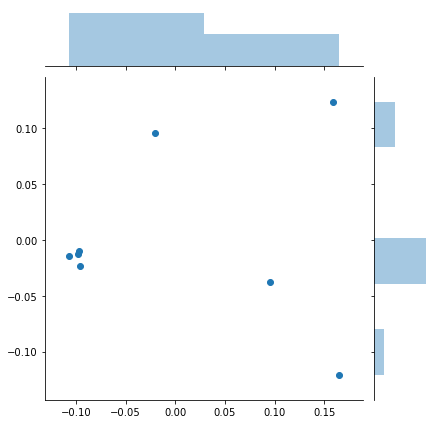

In [249]:
import warnings
warnings.filterwarnings("ignore")
sns.jointplot(x=pca_result[:,0], y=pca_result[:,1])
plt.show()  